**IMPORT LIBRARY**

In [0]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import seaborn as sns


In [0]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.models import load_model
import keras
import pandas_datareader.data as web
import h5py

**IMPORT DATA**

In [101]:
from google.colab import files

uploaded = files.upload()

Saving Data.csv to Data (3).csv


In [126]:
forex_df = pd.read_csv("Data.csv", index_col = 0)
forex_df.dropna(inplace=True)
forex_df.isnull().sum()

DEXSZUS    0
DEXCHUS    0
DEXMXUS    0
DEXBZUS    0
DEXINUS    0
dtype: int64

In [127]:
forex_df.head()

DEXSZUS  DEXCHUS  DEXMXUS  DEXBZUS  DEXINUS
observation_date                                             
5/20/2016          0.9920   6.5485  18.3770   3.5386    67.42
5/23/2016          0.9919   6.5533  18.4710   3.5753    67.47
5/24/2016          0.9930   6.5552  18.4435   3.5518    67.59
5/25/2016          0.9908   6.5538  18.4500   3.6072    67.28
5/26/2016          0.9898   6.5540  18.4500   3.5775    66.90

In [128]:
forex_df.describe()

DEXSZUS     DEXCHUS     DEXMXUS     DEXBZUS     DEXINUS
count  577.000000  577.000000  577.000000  577.000000  577.000000
mean     0.981327    6.662789   19.001787    3.332352   66.130191
std      0.020380    0.194325    0.877940    0.235594    1.746024
min      0.923200    6.264900   17.477500    3.055700   63.380000
25%      0.967300    6.561100   18.485000    3.169900   64.530000
50%      0.983100    6.668500   18.830000    3.253000   66.500000
75%      0.995300    6.842700   19.361000    3.386000   67.400000
max      1.033400    6.958000   21.891000    4.201600   71.940000

**Correlation Plot**

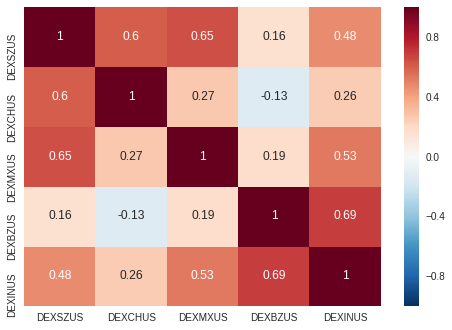

In [129]:
sns.heatmap(forex_df.corr(),annot= True)

**Dropping China's Foreign Exchange column**

**As  DEXCHUS has a corr value of 0.26 we are dropping that column**

In [0]:
forex_df.drop('DEXCHUS', axis=1,inplace=True)


In [131]:
forex_df.head()

DEXSZUS  DEXMXUS  DEXBZUS  DEXINUS
observation_date                                    
5/20/2016          0.9920  18.3770   3.5386    67.42
5/23/2016          0.9919  18.4710   3.5753    67.47
5/24/2016          0.9930  18.4435   3.5518    67.59
5/25/2016          0.9908  18.4500   3.6072    67.28
5/26/2016          0.9898  18.4500   3.5775    66.90

In [132]:
forex_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 577 entries, 5/20/2016 to 9/7/2018
Data columns (total 4 columns):
DEXSZUS    577 non-null float64
DEXMXUS    577 non-null float64
DEXBZUS    577 non-null float64
DEXINUS    577 non-null float64
dtypes: float64(4)
memory usage: 22.5+ KB


**No NULL values in forex_df dataset**

**Since the range of the columns are at  different scales we are NORMALIZING the data**

# Normalization

In [133]:
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['DEXINUS'] = min_max_scaler.fit_transform(df.DEXINUS.values.reshape(-1,1))
    df['DEXMXUS'] = min_max_scaler.fit_transform(df.DEXMXUS.values.reshape(-1,1))
    df['DEXBZUS'] = min_max_scaler.fit_transform(df.DEXBZUS.values.reshape(-1,1))
    df['DEXSZUS'] = min_max_scaler.fit_transform(df.DEXSZUS.values.reshape(-1,1))
    return df
  
forex_df_norm = normalize_data(forex_df)
forex_df_norm.head()

DEXSZUS   DEXMXUS   DEXBZUS   DEXINUS
observation_date                                        
5/20/2016         0.624319  0.203807  0.421415  0.471963
5/23/2016         0.623412  0.225105  0.453443  0.477804
5/24/2016         0.633394  0.218874  0.432935  0.491822
5/25/2016         0.613430  0.220347  0.481281  0.455607
5/26/2016         0.604356  0.220347  0.455363  0.411215

**Ploting  Normalized Forex Market**

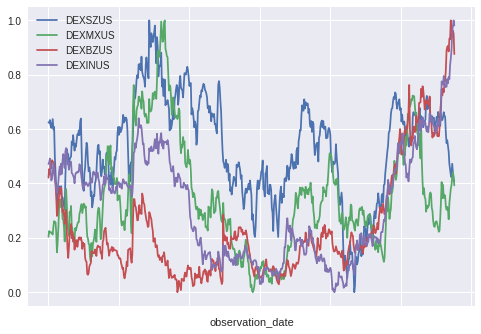

In [134]:
forex_df_norm[0:].plot()

In [0]:
seq_len = 22
d = 0.2
shape = [4, seq_len, 1] # feature, window, output
neurons = [128, 128, 32, 1]
epochs = 100

**Train Test Split**

**Converting  into arrays for  input to the neural network****

In [0]:
def load_data(forex, seq_len):
    amount_of_features = len(forex.columns)
    data = forex.as_matrix() 
    sequence_length = seq_len + 1 # index starting from 0
    result = []
    
    for index in range(len(data) - sequence_length): # maxmimum date = lastmost date - sequence length
        result.append(data[index: index + sequence_length]) # index : index + 22days
    
    result = np.array(result)
    row = round(0.9 * result.shape[0]) # 90% split
    m
    train = result[:int(row), :] # 90% date
    X_train = train[:, :-1] # all data until day 
    y_train = train[:, -1][:,-1] # day m + 1 for DEXINUS

    
    X_test = result[int(row):, :-1] # all data until day
    y_test = result[int(row):, -1][:,-1] # day m + 1 for DEXINUS

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], amount_of_features))#
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], amount_of_features))  

    return [X_train, y_train, X_test, y_test]

**We are incorporating 4 features(forex makets to predict India's FOREX)**

In [0]:
X_train, y_train, X_test, y_test = load_data(forex_df_norm , seq_len)

In [138]:
print(X_train.shape[0])#expected number of observations to read each batch
print(X_train.shape[1])# number of time steps
print(X_train.shape[2])#number of features.
print(X_test.shape[0])#expected number of observations to read each batch
print(X_test.shape[1])# number of time steps
print(X_test.shape[2])#number of features.


499
22
4
55
22
4


**MODEL**

In [0]:
  def build_model2(layers, neurons, d):
    model = Sequential()
    
    model.add(LSTM(neurons[0], input_shape=(layers[1], layers[0]), return_sequences=True))
    model.add(Dropout(d))
        
    model.add(LSTM(neurons[1], input_shape=(layers[1], layers[0]), return_sequences=False))
    model.add(Dropout(d))
        
    model.add(Dense(neurons[2],kernel_initializer="uniform",activation='relu'))        
    model.add(Dense(neurons[3],kernel_initializer="uniform",activation='linear'))
    # model = load_model('my_LSTM_stock_model1000.h5')
    # adam = keras.optimizers.Adam(decay=0.2)
    model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

In [140]:
model = build_model2(shape, neurons, d)
# layers = [4, 22, 1]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 22, 128)           68096     
_________________________________________________________________
dropout_5 (Dropout)          (None, 22, 128)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 203,841
Trainable params: 203,841
Non-trainable params: 0
_________________________________________________________________


In [141]:
model.fit(
    X_train,
    y_train,
    batch_size=24,
    epochs=100,
    validation_split=0.1,
    verbose=1)

Train on 449 samples, validate on 50 samples
Epoch 1/100
449/449 [==============================] - 4s 10ms/step - loss: 0.0459 - acc: 0.0022 - val_loss: 0.0603 - val_acc: 0.0000e+00
Epoch 2/100
449/449 [==============================] - 3s 6ms/step - loss: 0.0162 - acc: 0.0022 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 3/100
449/449 [==============================] - 3s 6ms/step - loss: 0.0048 - acc: 0.0022 - val_loss: 0.0046 - val_acc: 0.0000e+00
Epoch 4/100
449/449 [==============================] - 3s 6ms/step - loss: 0.0029 - acc: 0.0022 - val_loss: 0.0052 - val_acc: 0.0000e+00
Epoch 5/100
449/449 [==============================] - 3s 6ms/step - loss: 0.0026 - acc: 0.0022 - val_loss: 0.0050 - val_acc: 0.0000e+00
Epoch 6/100
449/449 [==============================] - 3s 6ms/step - loss: 0.0029 - acc: 0.0022 - val_loss: 0.0064 - val_acc: 0.0000e+00
Epoch 7/100
449/449 [==============================] - 3s 6ms/step - loss: 0.0031 - acc: 0.0022 - val_loss: 0.0040 - val_acc: 0.0000

In [0]:
def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

    testScore = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]

In [143]:
model_score(model, X_train, y_train, X_test, y_test)


Train Score: 0.00060 MSE (0.02 RMSE)
Test Score: 0.00469 MSE (0.07 RMSE)


(0.0006004237571734943, 0.004689315875822848)

In [0]:
def denormalize(forex_df_norm, normalized_value): 
    forex_df_norm = forex_df_norm['DEXINUS'].values.reshape(-1,1)
    normalized_value = normalized_value.reshape(-1,1)
    
    #return df.shape, p.shape
    min_max_scaler = preprocessing.MinMaxScaler()
    a = min_max_scaler.fit_transform(forex_df_norm)
    new = min_max_scaler.inverse_transform(normalized_value)
    return new

newp = denormalize(forex_df_norm, p)
newy_test = denormalize(forex_df_norm, y_test)


**Plot**

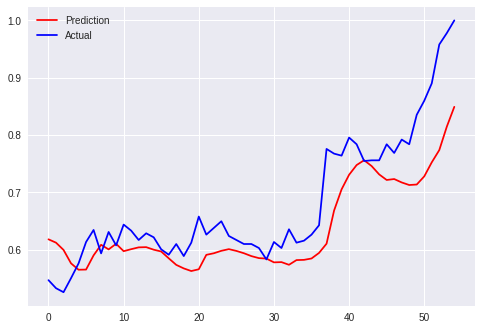

In [148]:
import matplotlib.pyplot as plt2

plt2.plot(newp,color='red', label='Prediction')
plt2.plot(newy_test,color='blue', label='Actual')
plt2.legend(loc='best')
plt2.show()

**END**

In [0]:

def percentage_difference(model, X_test, y_test):
    percentage_diff=[]

    p = model.predict(X_test)
    for u in range(len(y_test)): # for each data index in test data
        pr = p[u][0] # pr = prediction on day u

        percentage_diff.append((pr-y_test[u]/pr)*100)
    return p  

In [0]:
p = percentage_difference(model, X_test, y_test)


In [0]:
def denormalize(forex_df_norm, normalized_value):    
    stock_name = stock_name['DEXINUS'].values.reshape(-1,1)
    normalized_value = normalized_value.reshape(-1,1)
    
    #return df.shape, p.shape
    min_max_scaler = preprocessing.MinMaxScaler()
    a = min_max_scaler.fit_transform(df)
    new = min_max_scaler.inverse_transform(normalized_value)
    return new

In [0]:
def plot_result(stock_name, normalized_value_p, normalized_value_y_test):
    newp = denormalize(stock_name, normalized_value_p)
    newy_test = denormalize(stock_name, normalized_value_y_test)
    plt2.plot(newp, color='red', label='Prediction')
    plt2.plot(newy_test,color='blue', label='Actual')
    plt2.legend(loc='best')
    plt2.title('The test result for {}'.format(forex_df_norm))
    plt2.xlabel('Days')
    plt2.ylabel('Adjusted Close')
    plt2.show()

In [88]:
plot_result(stock_name, p, y_test)


UnboundLocalError: ignored

In [0]:
model.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.0005) , metrics = ['mean_squared_error'])


In [0]:
history = model.fit(X_train, y_train, epochs=100 , batch_size = 25 , 
            validation_data = (X_test,y_test))

Train on 518 samples, validate on 57 samples
Epoch 1/100
518/518 [==============================] - 5s 9ms/step - loss: 0.0477 - mean_squared_error: 0.0477 - val_loss: 0.0346 - val_mean_squared_error: 0.0346
Epoch 2/100
518/518 [==============================] - 0s 662us/step - loss: 0.0145 - mean_squared_error: 0.0145 - val_loss: 0.0796 - val_mean_squared_error: 0.0796
Epoch 3/100
518/518 [==============================] - 0s 699us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0377 - val_mean_squared_error: 0.0377
Epoch 4/100
518/518 [==============================] - 0s 667us/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 5/100
518/518 [==============================] - 0s 675us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 6/100
518/518 [==============================] - 0s 718us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0014 

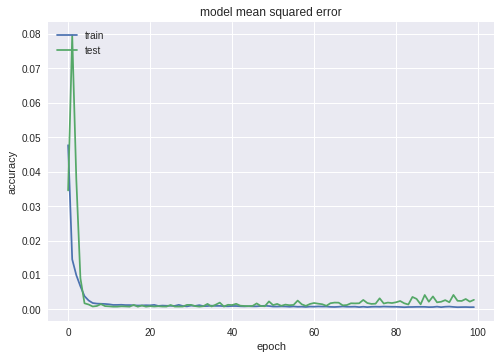

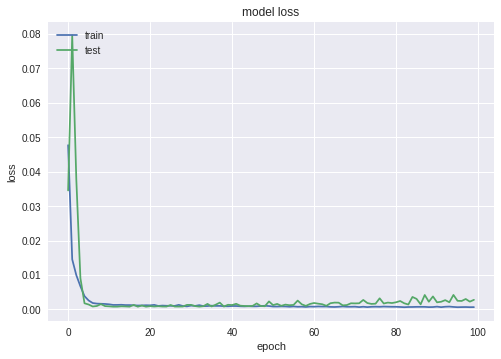

In [0]:

import matplotlib.pyplot as plt

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model mean squared error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))
    testScore = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]

model_score(model, X_train, y_train, X_test, y_test)

Train Score: 0.00047 MSE (0.02 RMSE)
Test Score: 0.00278 MSE (0.05 RMSE)


(0.00047402550321626097, 0.002784527201009424)

In [0]:
pred = model.predict(X_test)
pred = MinMaxScaler.inverse_transform(pred)
pred[:10]


def denormalize(forex_df_norm, normalized_value): 
    forex_df_norm = forex_df_norm['DEXINUS'].values.reshape(-1,1)
    normalized_value = normalized_value.reshape(-1,1)
    
    #return df.shape, p.shape
    min_max_scaler = preprocessing.MinMaxScaler()
    a = min_max_scaler.fit_transform(forex_df_norm)
    new = min_max_scaler.inverse_transform(normalized_value)
    return new

newp = denormalize(forex_df_norm, p)
newy_test = denormalize(forex_df_norm, y_test)

TypeError: ignored

In [0]:
def percentage_difference(model, X_test, y_test):
    percentage_diff=[]

    p = model.predict(X_test)
    for u in range(len(y_test)): # for each data index in test data
        pr = p[u][0] # pr = prediction on day u

        percentage_diff.append((pr-y_test[u]/pr)*100)
    return p

In [0]:
pred = percentage_difference(model, X_test, y_test)


In [0]:
pred = model.predict(testX)
pred = scaler.inverse_transform(pred)
pred[:10]

In [0]:
model = build_model2(shape, neurons, d)
# layers = [4, 22, 1]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 22, 128)           68096     
_________________________________________________________________
dropout_3 (Dropout)          (None, 22, 128)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 203,841
Trainable params: 203,841
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(
    X_train,
    y_train,
    batch_size=24,
    epochs=epochs,
    validation_split=0.1,
    verbose=1)

Train on 449 samples, validate on 50 samples
Epoch 1/300
449/449 [==============================] - 3s 6ms/step - loss: 0.0020 - acc: 0.0022 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 2/300
449/449 [==============================] - 2s 5ms/step - loss: 0.0021 - acc: 0.0022 - val_loss: 0.0034 - val_acc: 0.0000e+00
Epoch 3/300
449/449 [==============================] - 2s 5ms/step - loss: 0.0018 - acc: 0.0022 - val_loss: 0.0024 - val_acc: 0.0000e+00
Epoch 4/300
449/449 [==============================] - 2s 5ms/step - loss: 0.0023 - acc: 0.0022 - val_loss: 0.0064 - val_acc: 0.0000e+00
Epoch 5/300
449/449 [==============================] - 2s 5ms/step - loss: 0.0019 - acc: 0.0022 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 6/300
449/449 [==============================] - 2s 5ms/step - loss: 0.0016 - acc: 0.0022 - val_loss: 0.0052 - val_acc: 0.0000e+00
Epoch 7/300
449/449 [==============================] - 2s 5ms/step - loss: 0.0018 - acc: 0.0022 - val_loss: 0.0041 - val_acc: 0.0000e

In [0]:
def percentage_difference(model, X_test, y_test):
    percentage_diff=[]

    p = model.predict(X_test)
    for u in range(len(y_test)): # for each data index in test data
        pr = p[u][0] # pr = prediction on day u

        percentage_diff.append((pr-y_test[u]/pr)*100)
    return p
  

In [0]:
p = percentage_difference(model, X_test, y_test)
forex_df_norm

DEXSZUS   DEXMXUS   DEXBZUS   DEXINUS
observation_date                                        
5/20/2016         0.624319  0.203807  0.421415  0.471963
5/23/2016         0.623412  0.225105  0.453443  0.477804
5/24/2016         0.633394  0.218874  0.432935  0.491822
5/25/2016         0.613430  0.220347  0.481281  0.455607
5/26/2016         0.604356  0.220347  0.455363  0.411215
5/27/2016         0.620690  0.215362  0.485644  0.418224
5/31/2016         0.637024  0.211963  0.481456  0.436916
6/1/2016          0.598911  0.242438  0.477616  0.474299
6/2/2016          0.607985  0.261584  0.473078  0.448598
6/3/2016          0.498185  0.257052  0.416703  0.421729
6/6/2016          0.442831  0.257505  0.395933  0.400701
6/7/2016          0.391107  0.217175  0.353172  0.380841
6/8/2016          0.328494  0.146709  0.280391  0.365654
6/9/2016          0.369328  0.183754  0.294703  0.385514
6/10/2016         0.362976  0.237567  0.326468  0.404206
6/13/2016         0.390200  0.302934  0.352736  0.442757
6/14/2016         0.370236  0.340093  0.384152  0.462617
6/15/2016         0.376588  0.313923  0.362859  0.432243
6/16/2016         0.390200  0.342132  0.383541  0.473131
6/17/2016         0.343013  0.313583  0.326730  0.435748
6/20/2016         0.348457  0.269287  0.294965  0.485981
6/21/2016         0.330309  0.266795  0.303779  0.508178
6/22/2016         0.319419  0.238473  0.282485  0.480140
6/23/2016         0.303085  0.186587  0.251593  0.456776
6/24/2016         0.426497  0.311997  0.291299  0.518692
6/27/2016         0.503630  0.379404  0.302644  0.530374
6/28/2016         0.526316  0.324572  0.219653  0.523364
6/29/2016         0.509982  0.239719  0.159613  0.471963
6/30/2016         0.508167  0.230203  0.126189  0.482477
7/1/2016          0.451906  0.207432  0.165023  0.450935
...                    ...       ...       ...       ...
7/27/2018         0.642468  0.245157  0.573959  0.609813
7/30/2018         0.592559  0.240172  0.582162  0.609813
7/31/2018         0.601633  0.253880  0.601536  0.602804
8/1/2018          0.627042  0.260111  0.608517  0.582944
8/2/2018          0.645191  0.260451  0.610699  0.613318
8/3/2018          0.629764  0.248102  0.573872  0.602804
8/6/2018          0.663339  0.236547  0.580417  0.635514
8/7/2018          0.646098  0.222273  0.573436  0.612150
8/8/2018          0.645191  0.226691  0.600838  0.615654
8/9/2018          0.611615  0.272573  0.663845  0.626168
8/10/2018         0.655172  0.330917  0.696570  0.642523
8/13/2018         0.637024  0.405121  0.747535  0.775701
8/14/2018         0.633394  0.345871  0.723885  0.767523
8/15/2018         0.644283  0.394698  0.748582  0.764019
8/16/2018         0.662432  0.346890  0.735492  0.795561
8/17/2018         0.649728  0.358672  0.770399  0.783879
8/20/2018         0.645191  0.352781  0.778078  0.754673
8/21/2018         0.584392  0.315056  0.819531  0.755841
8/22/2018         0.548094  0.303274  0.889606  0.755841
8/23/2018         0.558984  0.313923  0.902435  0.783879
8/24/2018         0.537205  0.303727  0.906449  0.768692
8/27/2018         0.517241  0.268268  0.885767  0.792056
8/28/2018         0.471869  0.327405  0.932978  0.783879
8/29/2018         0.453721  0.354367  0.930535  0.835280
8/30/2018         0.432849  0.380650  1.000000  0.859813
8/31/2018         0.422868  0.393339  0.935771  0.890187
9/4/2018          0.472777  0.424380  0.960206  0.957944
9/5/2018          0.439201  0.441713  0.962737  0.977804
9/6/2018          0.408348  0.426759  0.951654  1.000000
9/7/2018          0.410163  0.392772  0.875905  0.981308

[577 rows x 4 columns]

In [0]:
def denormalize(forex_df_norm, normalized_value): 
    stock_name = stock_name['DEXINUS'].values.reshape(-1,1)
    normalized_value = normalized_value.reshape(-1,1)
    

    #return df.shape, p.shape
    min_max_scaler = preprocessing.MinMaxScaler()
    a = min_max_scaler.fit_transform(stock_name)
    new = min_max_scaler.inverse_transform(normalized_value)
    return new

In [0]:
def plot_result(stock_name, normalized_value_p, normalized_value_y_test):
    newp = denormalize(stock_name, normalized_value_p)
    newy_test = denormalize(stock_name, normalized_value_y_test)
    plt2.plot(newp, color='red', label='Prediction')
    plt2.plot(newy_test,color='blue', label='Actual')
    plt2.legend(loc='best')
    plt2.title('The test result for {}'.format(forex_df_norm))
    plt2.xlabel('Days')
    plt2.ylabel('DEXINUS')
    plt2.show()

In [0]:
def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

    testScore = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]


model_score(model, X_train, y_train, X_test, y_test)

Train Score: 0.00047 MSE (0.02 RMSE)
Test Score: 0.00425 MSE (0.07 RMSE)


(0.0004657650448546142, 0.004248936152593656)

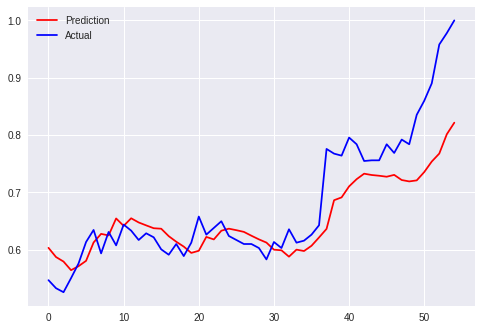

In [0]:
import matplotlib.pyplot as plt2

plt2.plot(newp,color='red', label='Prediction')
plt2.plot(newy_test,color='blue', label='Actual')
plt2.legend(loc='best')
plt2.show()

**Saving Model**

In [0]:
model.save('LSTM_forex_prediction-20170429.h5')


**Hyperparameter Optimization**

In [0]:
seq_len = 22
shape = [4, seq_len, 1] # feature, window, output
neurons = [128, 128, 32, 1]
epochs = 300

In [0]:
def quick_measure(forex_df_norm, seq_len, d, shape, neurons, epochs):
    df = forex_df_norm
    X_train, y_train, X_test, y_test = load_data(df, seq_len)
    model = build_model2(shape, neurons, d)
    model.fit(X_train, y_train, batch_size=24, epochs=epochs, validation_split=0.1, verbose=1)
    # model.save('LSTM_Forex_prediction-20170429.h5')
    trainScore, testScore = model_score(model, X_train, y_train, X_test, y_test)
    return trainScore, testScore

In [0]:
dlist = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
neurons_LSTM = [32, 64, 128, 256, 512, 1024, 2048]
dropout_result = {}

for d in dlist:    
    trainScore, testScore = quick_measure(forex_df_norm, seq_len, d, shape, neurons, epochs)
    dropout_result[d] = testScore

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 22, 128)           68096     
_________________________________________________________________
dropout_9 (Dropout)          (None, 22, 128)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 203,841
Trainable params: 203,841
Non-trainable params: 0
_________________________________________________________________
Trai

In [0]:
def percentage_difference(model, X_test, y_test):
    percentage_diff=[]

    p = model.predict(X_test)
    for u in range(len(y_test)): # for each data index in test data
        pr = p[u][0] # pr = prediction on day u

        percentage_diff.append((pr-y_test[u]/pr)*100)
    return p
  

In [0]:
def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

    testScore = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]


model_score(model, X_train, y_train, X_test, y_test)

In [0]:
lists = sorted(seq_len_result.items())
x,y = zip(*lists)
plt.plot(x,y)
plt.title('Finding the best hyperparameter')
plt.xlabel('Days')
plt.ylabel('Mean Square Error')
plt.show()

NameError: ignored